In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
df = pd.read_csv("data/all.csv")

# Display the first few rows of the DataFrame
print(df.head())

        Datum Abfahrt (laut Plan) Ankunft (laut Plan)       Zug  \
0  09.05.2022               17:22               18:48   ICE 727   
1  09.05.2022               18:22               19:48   ICE 729   
2  09.05.2022               18:54               20:30   ICE 129   
3  09.05.2022               19:08               20:48   ICE 821   
4  09.05.2022               19:28               22:13  ICE 1021   

   Verspätung (am Zielbahnhof) Zugausfall  
0                           19        NaN  
1                           32        NaN  
2                           12        NaN  
3                           26        NaN  
4                           27        NaN  


# Percentage of Cancelled trains

2084 values that are not cancelled

In [24]:
nan_count = int(df['Zugausfall'].isna().sum()) / df.shape[0]
nan_count * 100


92.64747389218176

In [25]:
(1 - nan_count) *100

7.352526107818235

Above 7% of the trains were cancelled in this dataset 

*** The trains that were canceled have value 0 as Delayed (only 30 values not, which are not very representative)

## Histogram

In [26]:
df.head()

,Datum,Abfahrt (laut Plan),Ankunft (laut Plan),Zug,Verspätung (am Zielbahnhof),Zugausfall
0,09.05.2022,17:22,18:48,ICE 727,19,NaN
1,09.05.2022,18:22,19:48,ICE 729,32,NaN
2,09.05.2022,18:54,20:30,ICE 129,12,NaN
3,09.05.2022,19:08,20:48,ICE 821,26,NaN
4,09.05.2022,19:28,22:13,ICE 1021,27,NaN


In [27]:
delayed_train = df[df['Verspätung (am Zielbahnhof)'] != 0]
delayed_train = delayed_train[delayed_train['Zugausfall'].isna()]
delayed_train

,Datum,Abfahrt (laut Plan),Ankunft (laut Plan),Zug,Verspätung (am Zielbahnhof),Zugausfall
0,09.05.2022,17:22,18:48,ICE 727,19,NaN
1,09.05.2022,18:22,19:48,ICE 729,32,NaN
2,09.05.2022,18:54,20:30,ICE 129,12,NaN
3,09.05.2022,19:08,20:48,ICE 821,26,NaN
4,09.05.2022,19:28,22:13,ICE 1021,27,NaN
...,...,...,...,...,...,...
28321,22.01.2021,18:22,19:48,ICE 729,7,NaN
28322,22.01.2021,18:48,20:31,ICE 129,10,NaN
28330,23.01.2021,07:21,08:48,ICE 527,2,NaN
28336,23.01.2021,13:08,14:48,ICE 629,2,NaN


In [28]:
df.head()

,Datum,Abfahrt (laut Plan),Ankunft (laut Plan),Zug,Verspätung (am Zielbahnhof),Zugausfall
0,09.05.2022,17:22,18:48,ICE 727,19,NaN
1,09.05.2022,18:22,19:48,ICE 729,32,NaN
2,09.05.2022,18:54,20:30,ICE 129,12,NaN
3,09.05.2022,19:08,20:48,ICE 821,26,NaN
4,09.05.2022,19:28,22:13,ICE 1021,27,NaN


In [29]:
df = delayed_train

In [30]:
# Find the maximum value in 'values_column'
max_value = df['Verspätung (am Zielbahnhof)'].max()
max_value

np.int64(344)

In [31]:
df.head()

,Datum,Abfahrt (laut Plan),Ankunft (laut Plan),Zug,Verspätung (am Zielbahnhof),Zugausfall
0,09.05.2022,17:22,18:48,ICE 727,19,NaN
1,09.05.2022,18:22,19:48,ICE 729,32,NaN
2,09.05.2022,18:54,20:30,ICE 129,12,NaN
3,09.05.2022,19:08,20:48,ICE 821,26,NaN
4,09.05.2022,19:28,22:13,ICE 1021,27,NaN


In [32]:
df = df[df['Verspätung (am Zielbahnhof)'] < 100]

In [33]:
# Assuming 'df' is your DataFrame and 'Verspätung (am Zielbahnhof)' is the column to plot
data = df['Verspätung (am Zielbahnhof)'].dropna()
# Define the number of bins
bins = int(data.max() - data.min()) + 1
bins

99

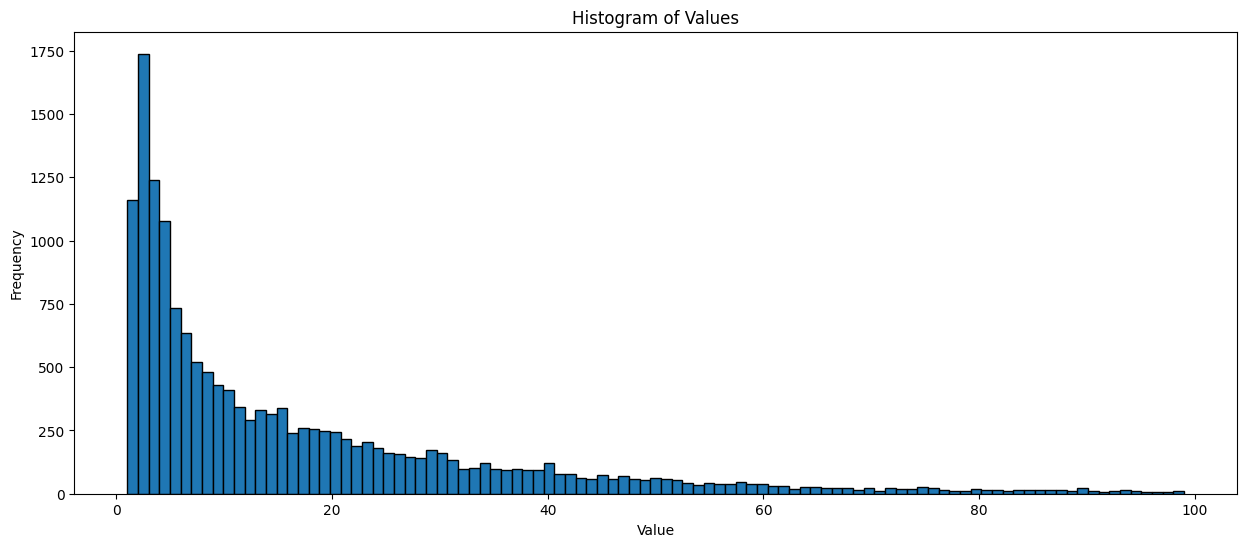

In [34]:
# Create a figure with a rectangular aspect ratio
plt.figure(figsize=(15, 6))  # Width, Height in inches

# Plotting the histogram
plt.hist(df['Verspätung (am Zielbahnhof)'], bins=bins, edgecolor='black')  # Adjust the bins parameter as needed



# plt.xticks(range(min(df['Verspätung (am Zielbahnhof)']), max(df['Verspätung (am Zielbahnhof)']) + 1))
# plt.xticks(np.arange(data.min(), data.max() + 1, 1))

# Add titles and labels
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## New analysis per interval

In [35]:
# Define bin edges
bin_edges = [0, 5, 10, 15, 20, 30, 45, 60, 90, 120, 180, 240, 300, 350]
bin_labels = ['0-5', '6-10', '11-15', '16-20', '21-30', '31-45', '46-60', '61-90', '91-120', '121-180', '181-240', '241-300', '301+']  # Labels for bins

In [36]:
# Define bin edges
bin_edges = [0, 10, 30, 45, 60, 90, 344]
bin_labels = ['< 10', '10-30', '30-45', '45-60', '60-90', '> 90']  # Labels for bins

In [37]:
# Bin the data
df['Interval'] = pd.cut(df['Verspätung (am Zielbahnhof)'], bins=bin_edges, labels=bin_labels, right=False)

/tmp/ipykernel_36220/3507674430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Interval'] = pd.cut(df['Verspätung (am Zielbahnhof)'], bins=bin_edges, labels=bin_labels, right=False)


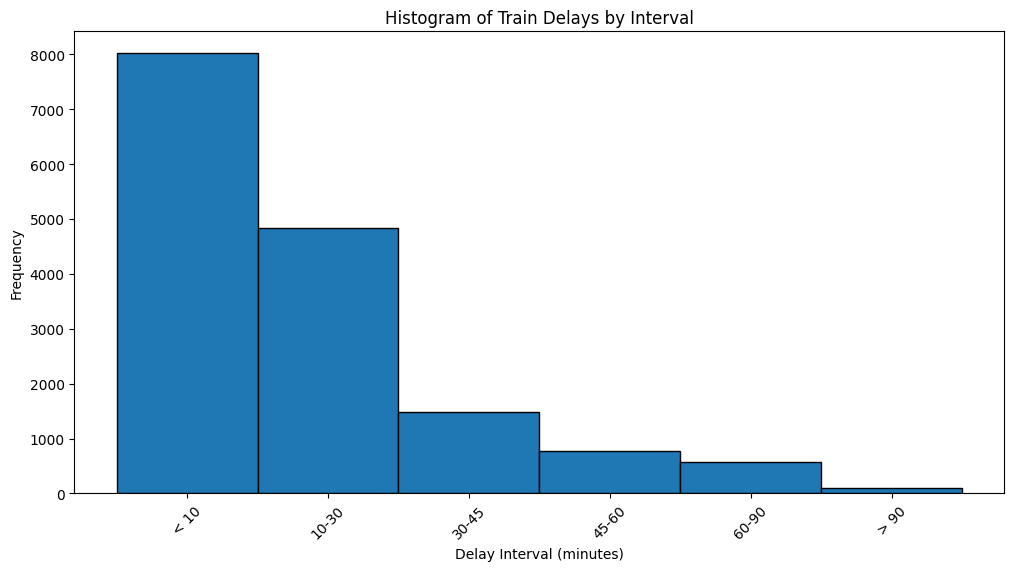

In [38]:
# Count the frequency of each interval
interval_counts = df['Interval'].value_counts(sort=False)  # sort=False to maintain order

# Plotting the histogram
plt.figure(figsize=(12, 6))
# plt.bar(interval_counts.index, interval_counts.values, edgecolor='black')
bar_width = 1.0  # Set to 1.0 to make bars touch each other
plt.bar(interval_counts.index, interval_counts.values, width=bar_width, edgecolor='black')

# Add titles and labels
plt.title('Histogram of Train Delays by Interval')
plt.xlabel('Delay Interval (minutes)')
plt.ylabel('Frequency')



# Rotate x-ticks if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

## FULL DATASET

In [39]:
df = pd.read_csv("data/all.csv")

# Display the first few rows of the DataFrame
df.head()

,Datum,Abfahrt (laut Plan),Ankunft (laut Plan),Zug,Verspätung (am Zielbahnhof),Zugausfall
0,09.05.2022,17:22,18:48,ICE 727,19,NaN
1,09.05.2022,18:22,19:48,ICE 729,32,NaN
2,09.05.2022,18:54,20:30,ICE 129,12,NaN
3,09.05.2022,19:08,20:48,ICE 821,26,NaN
4,09.05.2022,19:28,22:13,ICE 1021,27,NaN


In [40]:
data = df['Verspätung (am Zielbahnhof)']


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28344 entries, 0 to 28343
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Datum                        28344 non-null  object
 1   Abfahrt (laut Plan)          28344 non-null  object
 2   Ankunft (laut Plan)          28344 non-null  object
 3   Zug                          28344 non-null  object
 4   Verspätung (am Zielbahnhof)  28344 non-null  int64 
 5   Zugausfall                   2084 non-null   object
dtypes: int64(1), object(5)
memory usage: 1.3+ MB


In [42]:
# Convert the 'Date' column to datetime, specifying the format
df['Date'] = pd.to_datetime(df['Datum'], format='%d.%m.%Y')

In [43]:
df.head()

,Datum,Abfahrt (laut Plan),Ankunft (laut Plan),Zug,Verspätung (am Zielbahnhof),Zugausfall,Date
0,09.05.2022,17:22,18:48,ICE 727,19,NaN,2022-05-09
1,09.05.2022,18:22,19:48,ICE 729,32,NaN,2022-05-09
2,09.05.2022,18:54,20:30,ICE 129,12,NaN,2022-05-09
3,09.05.2022,19:08,20:48,ICE 821,26,NaN,2022-05-09
4,09.05.2022,19:28,22:13,ICE 1021,27,NaN,2022-05-09


In [44]:
# Get the maximum datetime value
max_datetime = df['Date'].max()
print(f"Max datetime: {max_datetime}")

# Get the minimum datetime value
min_datetime = df['Date'].min()
print(f"Min datetime: {min_datetime}")

Max datetime: 2024-09-09 00:00:00
Min datetime: 2021-01-20 00:00:00


In [45]:
df['Date'] = pd.to_datetime(df['Datum'], format ='ISO8601')

ValueError: Time data 09.05.2022 is not ISO8601 format, at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])


In [46]:
df.head()

,Datum,Abfahrt (laut Plan),Ankunft (laut Plan),Zug,Verspätung (am Zielbahnhof),Zugausfall,Date
0,09.05.2022,17:22,18:48,ICE 727,19,NaN,2022-05-09
1,09.05.2022,18:22,19:48,ICE 729,32,NaN,2022-05-09
2,09.05.2022,18:54,20:30,ICE 129,12,NaN,2022-05-09
3,09.05.2022,19:08,20:48,ICE 821,26,NaN,2022-05-09
4,09.05.2022,19:28,22:13,ICE 1021,27,NaN,2022-05-09


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28344 entries, 0 to 28343
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Datum                        28344 non-null  object
 1   Abfahrt (laut Plan)          28344 non-null  object
 2   Ankunft (laut Plan)          28344 non-null  object
 3   Zug                          28344 non-null  object
 4   Verspätung (am Zielbahnhof)  28344 non-null  int64 
 5   Zugausfall                   2084 non-null   object
dtypes: int64(1), object(5)
memory usage: 1.3+ MB


In [193]:
data_zero = df[df['Verspätung (am Zielbahnhof)'] == 0]
data_zero 

,Datum,Abfahrt (laut Plan),Ankunft (laut Plan),Zug,Verspätung (am Zielbahnhof),Zugausfall
5,09.05.2022,20:09,21:48,ICE 823,0,NaN
7,09.05.2022,21:01,22:31,ICE 221,0,NaN
8,09.05.2022,23:27,01:10,ICE 619,0,NaN
9,09.05.2022,23:27,02:22,IC 60403,0,NaN
11,10.05.2022,23:27,01:10,ICE 619,0,NaN
...,...,...,...,...,...,...
28338,23.01.2021,14:21,15:48,ICE 721,0,NaN
28339,23.01.2021,15:11,16:48,ICE 723,0,NaN
28340,23.01.2021,16:22,17:48,ICE 725,0,NaN
28341,23.01.2021,17:22,18:48,ICE 727,0,NaN


In [232]:
(df[df['Verspätung (am Zielbahnhof)'] == 0].shape[0] / df.shape[0]) * 100

43.10259666948914

In [ ]:
data_n0 = data_no_zero['Verspätung (am Zielbahnhof)']

In [226]:
(df[(df['Verspätung (am Zielbahnhof)'] > 0) & (df['Verspätung (am Zielbahnhof)'] < 15) & (df['Zugausfall'].isna())].shape[0] / df.shape[0]) * 100

34.24710697149308

In [227]:
(df[(df['Verspätung (am Zielbahnhof)'] >= 15) & (df['Verspätung (am Zielbahnhof)'] < 30) & (df['Zugausfall'].isna())].shape[0] / df.shape[0]) * 100

11.11346316680779

In [214]:
(df[(df['Verspätung (am Zielbahnhof)'] >= 30) & (df['Verspätung (am Zielbahnhof)'] < 60) & (df['Zugausfall'].isna())].shape[0] / df.shape[0]) * 100

8.019333897826701

In [229]:
(df[(df['Verspätung (am Zielbahnhof)'] >= 60) & (df['Verspätung (am Zielbahnhof)'] < 90) & (df['Zugausfall'].isna())].shape[0] / df.shape[0]) * 100

2.0427603725656227

In [230]:
(df[(df['Verspätung (am Zielbahnhof)'] >= 60) & (df['Verspätung (am Zielbahnhof)'] < 90) & (df['Zugausfall'].isna())].shape[0] / df.shape[0]) * 100

8.760231442280553

In [ ]:
(df[df['Verspätung (am Zielbahnhof)'] == 0].shape[0] / df.shape[0]) * 100

In [ ]:
data_n0 = data_no_zero['Verspätung (am Zielbahnhof)']

In [194]:
df.shape

(28344, 6)

In [ ]:
data_zero

In [178]:
data_no_zero = df[df['Verspätung (am Zielbahnhof)'] != 0]

In [179]:
data_n0 = data_no_zero['Verspätung (am Zielbahnhof)']

In [180]:
# Define bin edges
bin_edges = [0, 15, 30, 45, 60, 90]

# Compute histogram
counts, edges = np.histogram(data_n0, bins=bin_edges)

In [188]:
df_test = df[df['Verspätung (am Zielbahnhof)'] > 90]
df_test

,Datum,Abfahrt (laut Plan),Ankunft (laut Plan),Zug,Verspätung (am Zielbahnhof),Zugausfall
93,13.05.2022,15:27,18:13,ICE 927,134,NaN
99,13.05.2022,19:28,22:13,ICE 1021,110,NaN
101,13.05.2022,20:27,23:12,IC 2215,137,NaN
122,14.05.2022,15:47,18:52,ICE 927,141,NaN
147,15.05.2022,14:21,15:48,ICE 721,100,NaN
...,...,...,...,...,...,...
27899,30.04.2022,23:27,01:10,ICE 619,103,NaN
27953,02.05.2022,19:28,22:13,ICE 1021,121,NaN
28093,07.05.2022,15:47,19:04,ICE 927,95,NaN
28107,08.05.2022,09:13,10:48,ICE 621,100,NaN


In [190]:
df_test_2 = df[df['Zugausfall'].notna()]
df_test_2

,Datum,Abfahrt (laut Plan),Ankunft (laut Plan),Zug,Verspätung (am Zielbahnhof),Zugausfall
20,11.05.2022,08:52,10:31,ICE 121,0,Ausfall (Startbahnhof)
25,11.05.2022,12:58,14:26,ICE 123,0,Ausfall (Startbahnhof)
29,11.05.2022,14:57,16:31,ICE 125,0,Ausfall (Startbahnhof)
33,11.05.2022,16:58,18:31,ICE 127,0,Ausfall (Startbahnhof)
56,12.05.2022,12:58,14:26,ICE 123,0,Ausfall (Startbahnhof)
...,...,...,...,...,...,...
28109,08.05.2022,11:08,12:48,ICE 625,0,Ausfall (Startbahnhof)
28112,08.05.2022,13:33,15:24,ICE 817,0,Ausfall (Startbahnhof)
28133,09.05.2022,10:10,11:48,ICE 623,0,Ausfall (Startbahnhof)
28142,09.05.2022,15:11,16:48,ICE 723,0,Ausfall (Startbahnhof)


In [ ]:
20

In [ ]:
df_test_2 = df[df['Zugausfall'].i]
df_test_2

In [183]:
# Print counts for each bin
for i in range(len(counts)):
    print(f"Bin {bin_edges[i]} to {bin_edges[i+1]}: {counts[i]} values")

Bin 0 to 15: 9715 values
Bin 15 to 30: 3156 values
Bin 30 to 45: 1496 values
Bin 45 to 60: 777 values
Bin 60 to 90: 602 values


In [182]:
9715+3156+1496+777+602

15746

In [ ]:
# Print counts for each bin
for i in range(len(counts)):
    print(f"Bin {bin_edges[i]} to {bin_edges[i+1]}: {counts[i]} values")

In [169]:
len(data_first_bin)

12217

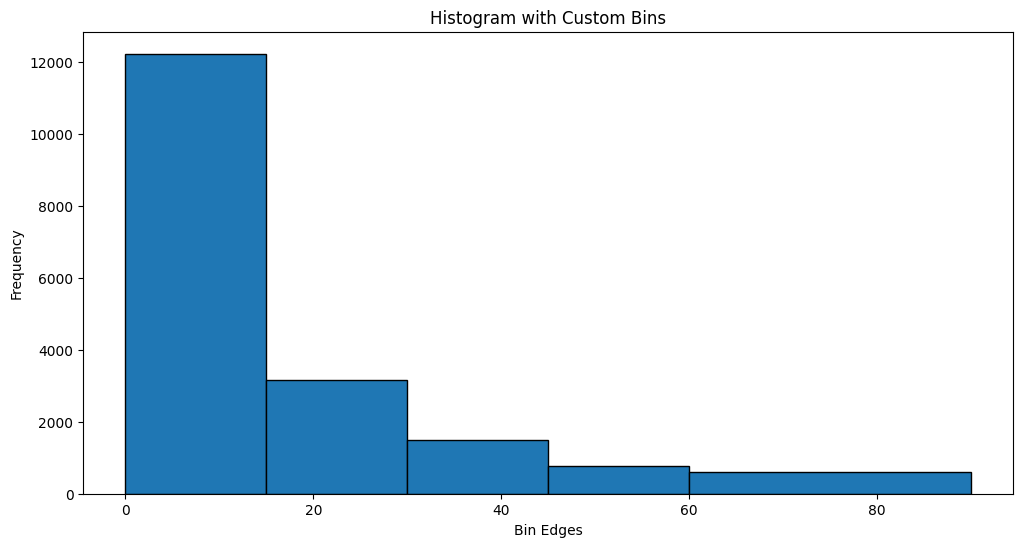

In [168]:
# Define bin edges
bin_edges = [0, 15, 30, 45, 60, 90]

# Separate the data that falls into the first bin (only 0)
data_first_bin = [x for x in data if x == 0]

data_remaining_bins = [x for x in data if x > 0]

# Create histogram for the remaining data
counts, _ = np.histogram(data_remaining_bins, bins=bin_edges[1:])

# Add count for the first bin manually
counts = [len(data_first_bin)] + list(counts)

# Create the histogram plot
plt.figure(figsize=(12, 6))

# plt.bar(bin_edges[0], counts[0], width=np.diff(bin_edges)[0], color='red', edgecolor='black', align='edge', label='0 Delay')
# plt.bar(bin_edges[-1], counts, width=np.diff(bin_edges)[-1], edgecolor='black', align='edge')

# Plot the histogram
plt.bar(bin_edges[:-1], counts, width=np.diff(bin_edges), edgecolor='black', align='edge')
# plt.bar(bin_edges[:-1], counts, width=bin_widths[0], edgecolor='black', align='edge')

# Add labels and title
plt.xlabel('Bin Edges')
plt.ylabel('Frequency')
plt.title('Histogram with Custom Bins')

# Show the plot
plt.show()

In [8]:
df.head()

,Datum,Abfahrt (laut Plan),Ankunft (laut Plan),Zug,Verspätung (am Zielbahnhof),Zugausfall,Date
0,09.05.2022,17:22,18:48,ICE 727,19,NaN,2022-05-09
1,09.05.2022,18:22,19:48,ICE 729,32,NaN,2022-05-09
2,09.05.2022,18:54,20:30,ICE 129,12,NaN,2022-05-09
3,09.05.2022,19:08,20:48,ICE 821,26,NaN,2022-05-09
4,09.05.2022,19:28,22:13,ICE 1021,27,NaN,2022-05-09


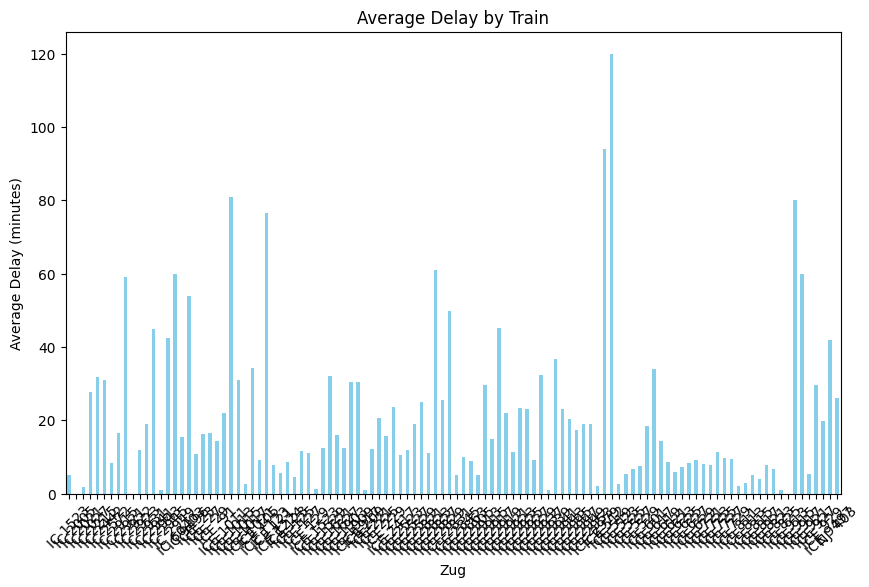

In [14]:
# Plot average delays by train
plt.figure(figsize=(10, 6))
df.groupby('Zug')['Verspätung (am Zielbahnhof)'].mean().plot(kind='bar', color='skyblue')
plt.xlabel('Train')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay by Train')
plt.xticks(rotation=45)
plt.show()

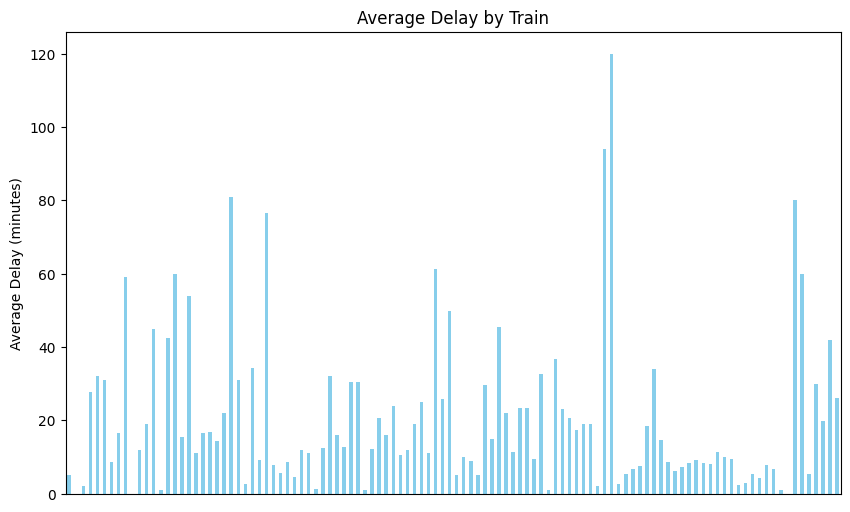

In [19]:
import pandas as pd
import matplotlib.pyplot as plt



# Plot average delays by train
plt.figure(figsize=(10, 6))
ax = df.groupby('Zug')['Verspätung (am Zielbahnhof)'].mean().plot(kind='bar', color='skyblue', legend=False)
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay by Train')

# Remove x-axis information
ax.xaxis.set_visible(False)  # Hide the x-axis
ax.set_xticklabels([])  # Remove x-axis labels

plt.show()


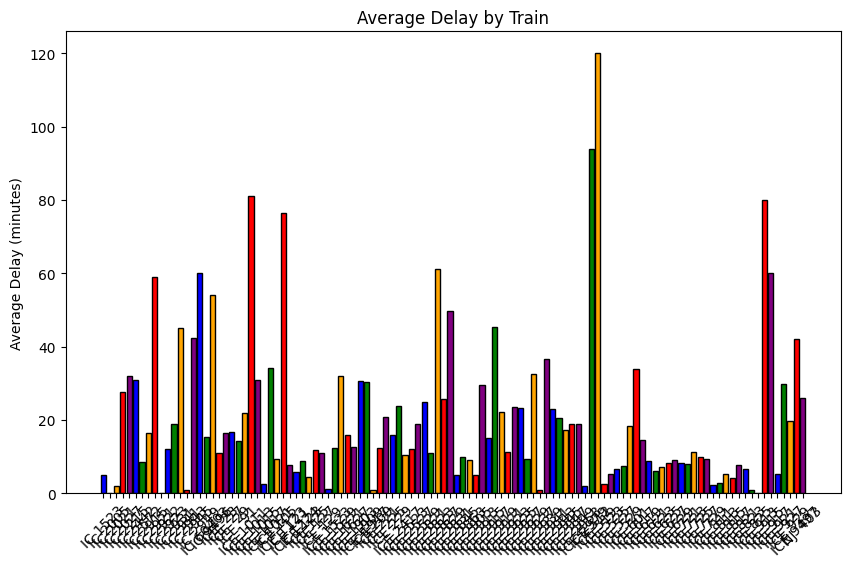

In [50]:
import pandas as pd
import matplotlib.pyplot as plt


# Group by 'Zug' and calculate the mean delay
mean_delays = df.groupby('Zug')['Verspätung (am Zielbahnhof)'].mean()

# Define colors for each train
colors = ['blue', 'green', 'orange', 'red', 'purple']  # Extend this list as needed

# Plot average delays by train with different colors
plt.figure(figsize=(10, 6))
plt.bar(mean_delays.index, mean_delays, color=colors[:len(mean_delays)], edgecolor='black')

# Add labels and title
# plt.xlabel('Train')
plt.ylabel('Average Delay (minutes)')
plt.title('Average Delay by Train')
plt.xticks(rotation=45)


# Remove x-axis information
ax.xaxis.set_visible(False)  # Hide the x-axis
ax.set_xticklabels([])  # Remove x-axis labels

# No legend to be added

plt.show()


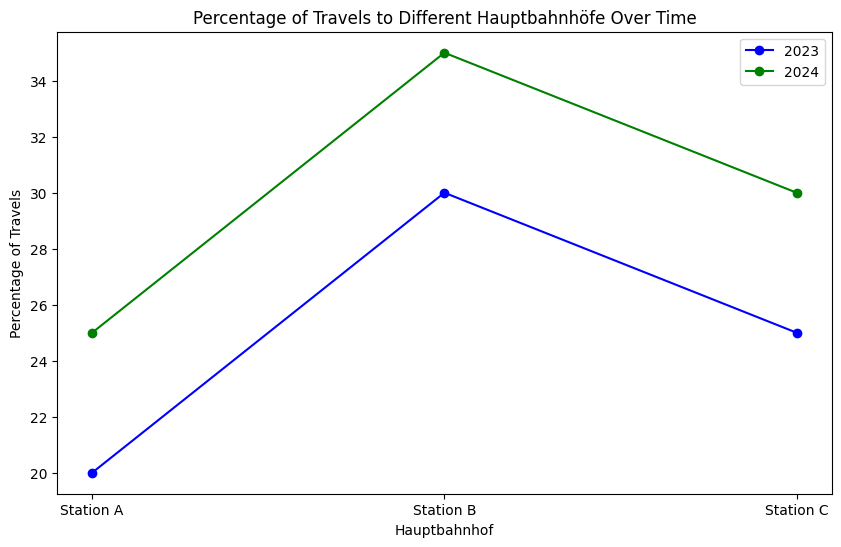

In [10]:
import matplotlib.pyplot as plt

# Sample data
stations = ['Station A', 'Station B', 'Station C']
percentages1 = [20, 30, 25]  # Data for year 2023
percentages2 = [25, 35, 30]  # Data for year 2024

# Create a line plot
plt.figure(figsize=(10, 6))
line1, = plt.plot(stations, percentages1, marker='o', color='blue', label='2023')
line2, = plt.plot(stations, percentages2, marker='o', color='green', label='2024')

# Add labels and title
plt.xlabel('Hauptbahnhof')
plt.ylabel('Percentage of Travels')
plt.title('Percentage of Travels to Different Hauptbahnhöfe Over Time')

# Add a legend
plt.legend(loc='upper right')

# Show the plot
plt.show()


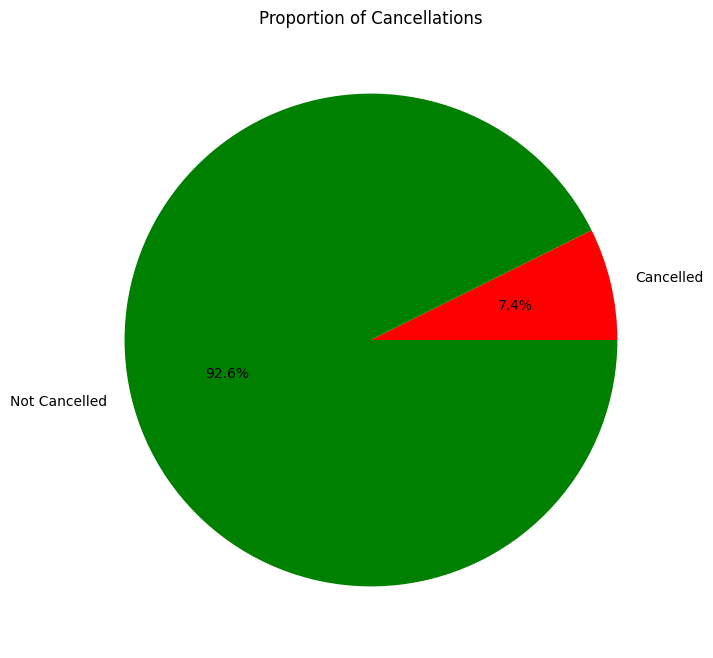

In [11]:
# Sample data for cancellations
cancellations = df['Zugausfall'].notna().sum()
total_trains = len(df)
cancellation_data = [cancellations, total_trains - cancellations]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(cancellation_data, labels=['Cancelled', 'Not Cancelled'], autopct='%1.1f%%', colors=['red', 'green'])
plt.title('Proportion of Cancellations')
plt.show()

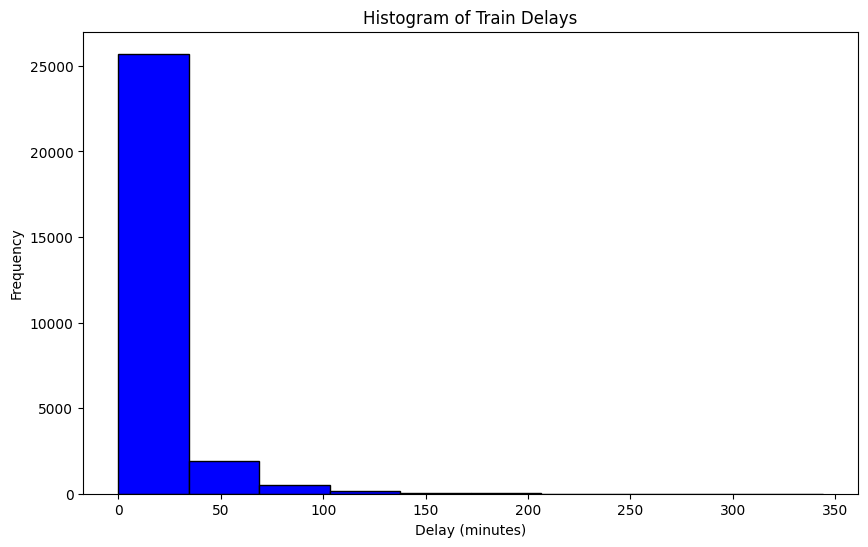

In [12]:
# Plot histogram of delays
plt.figure(figsize=(10, 6))
plt.hist(df['Verspätung (am Zielbahnhof)'], bins=10, color='blue', edgecolor='black')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Train Delays')
plt.show()


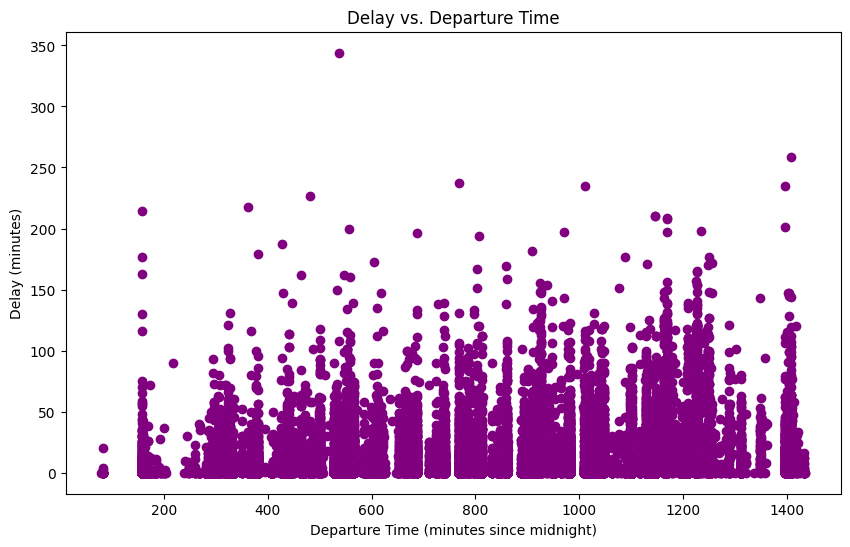

In [13]:
# Convert departure time to minutes since midnight for scatter plot
df['Abfahrt (laut Plan)'] = pd.to_datetime(df['Abfahrt (laut Plan)'], format='%H:%M').dt.hour * 60 + pd.to_datetime(df['Abfahrt (laut Plan)'], format='%H:%M').dt.minute

# Plot scatter plot of delays vs. departure time
plt.figure(figsize=(10, 6))
plt.scatter(df['Abfahrt (laut Plan)'], df['Verspätung (am Zielbahnhof)'], color='purple')
plt.xlabel('Departure Time (minutes since midnight)')
plt.ylabel('Delay (minutes)')
plt.title('Delay vs. Departure Time')
plt.show()
